In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
CB = CatBoostRegressor(verbose=False)

In [8]:
CB.fit(X_train, Y_train)

In [9]:
CB.score(X_test, Y_test)

0.9520318282021709

In [10]:
1325 in X_train.index

True

In [11]:
1325 in X_test.index

False

In [12]:
cb_results_train = CB.predict(X_train)

In [13]:
cb_results_test = CB.predict(X_test)

In [14]:
X_train_cb = X_train.assign(CB = cb_results_train)
X_train_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
1885,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,2.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1325,68.516053,17541,5,7,1948,2005,0.0,300.0,0.0,109.0,409.0,1325,0,0,0.0,0.0,2,0,3,1,6,1,1996.0,2.0,576.0,0,42,0,0,0,0,0,200082.753954
2178,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1414,65.000000,8773,7,5,2004,2004,98.0,24.0,0.0,1390.0,1414.0,1414,0,0,0.0,0.0,2,0,3,1,6,0,2004.0,2.0,494.0,132,105,0,0,0,0,0,183375.977000
1667,2.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,4.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1304,68.516053,2665,5,6,1976,1976,0.0,0.0,0.0,264.0,264.0,616,688,0,0.0,0.0,1,1,3,1,4,1,1976.0,1.0,336.0,141,24,0,0,0,0,0,113461.445803
1724,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1440,82.000000,9840,5,7,1959,1998,0.0,1053.0,0.0,195.0,1248.0,1440,0,0,1.0,0.0,2,0,2,1,7,0,1959.0,1.0,480.0,150,0,0,0,256,0,0,182227.388824
1773,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,4.0,2.0,1.0,0.0,9.0,9.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,1.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,4.0,9.0,4.0,1069,53.000000,4043,6,5,1977,1977,0.0,360.0,0.0,709.0,1069.0,1069,0,0,0.0,0.0,2,0,2,1,4,1,1977.0,2.0,440.0,0,55,0,0,165,0,0,132941.836029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1099,75.000000,9525,5,6,1995,2006,0.0,0.0,0.0,1099.0,1099.0,1099,0,0,0.0,0.0,1,1,3,1,6,0,1999.0,1.0,352.0,278,0,0,0,0,0,0,147542.773694
2531,9.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,3.0,5.0,1.0,2.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,1.0,1.0,2.0,3.0,4.0,1.0,7.0,1.0,5.0,4.0,1141,50.000000,5925,4,6,1900,1950,0.0,122.0,448.0,0.0,570.0,761,380,0,0.0,0.0,1,0,3,1,6,0,1930.0,1.0,252.0,0,0,96,0,0,0,0,83980.621501
658,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,1434,65.000000,8529,7,5,2001,2001,0.0,20.0,0.0,1434.0,1454.0,1434,0,0,0.0,0.0,2,0,3,1,6,1,2001.0,2.0,527.0,290,39,0,0,0,0,0,194265.671322
427,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,2.0,5.0,3.0,1.0,1.0,0.0,3.0,4.0,1.0,8.0,4.0,9.0,0.0,832,68.000000,9656,

In [15]:
X_test_cb = X_test.assign(CB = cb_results_test)
X_test_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
2266,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,1.0,2.0,3.0,4.0,1.0,9.0,2.0,9.0,4.0,720,68.516053,6627,3,6,1949,1950,0.0,0.0,0.0,0.0,0.0,720,0,0,0.0,0.0,1,0,2,1,4,0,1955.000000,1.0,287.0,0,0,0,0,0,0,0,81054.046785
1078,11.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,1.0,5.0,3.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,1470,60.000000,10560,6,7,1922,1994,0.0,283.0,0.0,455.0,738.0,868,602,0,0.0,0.0,1,1,2,1,6,0,1970.000000,2.0,624.0,0,0,0,0,0,0,0,139660.928515
84,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,22.0,3.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,2.0,1.0,2.0,6.0,1.0,4.0,1.0,0.0,4.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1188,88.000000,14175,6,8,1956,1956,0.0,776.0,0.0,212.0,988.0,1188,0,0,1.0,0.0,1,0,1,1,4,1,1956.000000,2.0,621.0,102,89,231,0,0,0,0,170477.882541
2204,15.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,0.0,4.0,9.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,9.0,4.0,2650,60.000000,7200,4,6,1967,1967,0.0,0.0,0.0,0.0,0.0,862,1788,0,0.0,0.0,3,0,6,2,10,0,1976.982048,0.0,0.0,0,0,0,0,0,0,500,146266.579295
1112,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,2402,105.000000,15431,10,5,2008,2008,200.0,1767.0,539.0,788.0,3094.0,2402,0,0,1.0,0.0,2,0,2,1,10,2,2008.000000,3.0,672.0,0,72,0,0,170,0,0,485190.216331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,0.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,0.0,9.0,4.0,1312,50.000000,7500,6,6,1947,1950,0.0,0.0,0.0,784.0,784.0,900,412,0,0.0,0.0,1,1,3,1,6,0,1953.000000,2.0,649.0,0,28,0,0,0,0,0,131095.839497
30,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,9.0,4.0,886,50.000000,5784,5,8,1938,1996,0.0,0.0,0.0,190.0,190.0,886,0,0,0.0,0.0,1,0,2,1,4,0,1938.000000,1.0,273.0,144,20,80,0,0,0,0,95391.194163
567,4.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,2.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,2350,60.000000,9600,5,5,1920,1960,0.0,234.0,0.0,739.0,973.0,1377,973,0,0.0,0.0,2,0,4,2,10,0,1930.000000,2.0,393.0,0,0,219,0,0,0,0,144713.994864
1088,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,14.0,9.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,2.0,5.0,0.0,5.0,5.0,0.0,3.0,4.0,1.0,9.0,2.0

In [16]:
Y_train

1885    216000
2178    185500
1667    115000
1724    185000
1773    127500
         ...  
449     144000
2531     85000
658     189000
427      12789
1247    354000
Name: SalePrice, Length: 1935, dtype: int64

In [17]:
X_train_full = X_train_cb.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
1885,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,2.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1325,68.516053,17541,5,7,1948,2005,0.0,300.0,0.0,109.0,409.0,1325,0,0,0.0,0.0,2,0,3,1,6,1,1996.0,2.0,576.0,0,42,0,0,0,0,0,200082.753954,216000
2178,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1414,65.000000,8773,7,5,2004,2004,98.0,24.0,0.0,1390.0,1414.0,1414,0,0,0.0,0.0,2,0,3,1,6,0,2004.0,2.0,494.0,132,105,0,0,0,0,0,183375.977000,185500
1667,2.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,4.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1304,68.516053,2665,5,6,1976,1976,0.0,0.0,0.0,264.0,264.0,616,688,0,0.0,0.0,1,1,3,1,4,1,1976.0,1.0,336.0,141,24,0,0,0,0,0,113461.445803,115000
1724,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1440,82.000000,9840,5,7,1959,1998,0.0,1053.0,0.0,195.0,1248.0,1440,0,0,1.0,0.0,2,0,2,1,7,0,1959.0,1.0,480.0,150,0,0,0,256,0,0,182227.388824,185000
1773,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,4.0,2.0,1.0,0.0,9.0,9.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,1.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,4.0,9.0,4.0,1069,53.000000,4043,6,5,1977,1977,0.0,360.0,0.0,709.0,1069.0,1069,0,0,0.0,0.0,2,0,2,1,4,1,1977.0,2.0,440.0,0,55,0,0,165,0,0,132941.836029,127500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1099,75.000000,9525,5,6,1995,2006,0.0,0.0,0.0,1099.0,1099.0,1099,0,0,0.0,0.0,1,1,3,1,6,0,1999.0,1.0,352.0,278,0,0,0,0,0,0,147542.773694,144000
2531,9.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,3.0,5.0,1.0,2.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,1.0,1.0,2.0,3.0,4.0,1.0,7.0,1.0,5.0,4.0,1141,50.000000,5925,4,6,1900,1950,0.0,122.0,448.0,0.0,570.0,761,380,0,0.0,0.0,1,0,3,1,6,0,1930.0,1.0,252.0,0,0,96,0,0,0,0,83980.621501,85000
658,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,1434,65.000000,8529,7,5,2001,2001,0.0,20.0,0.0,1434.0,1454.0,1434,0,0,0.0,0.0,2,0,3,1,6,1,2001.0,2.0,527.0,290,39,0,0,0,0,0,194265.671322,189000
427,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,2.

In [18]:
X_test_full = X_test_cb.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
2266,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,1.0,2.0,3.0,4.0,1.0,9.0,2.0,9.0,4.0,720,68.516053,6627,3,6,1949,1950,0.0,0.0,0.0,0.0,0.0,720,0,0,0.0,0.0,1,0,2,1,4,0,1955.000000,1.0,287.0,0,0,0,0,0,0,0,81054.046785,72500
1078,11.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,1.0,5.0,3.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,1470,60.000000,10560,6,7,1922,1994,0.0,283.0,0.0,455.0,738.0,868,602,0,0.0,0.0,1,1,2,1,6,0,1970.000000,2.0,624.0,0,0,0,0,0,0,0,139660.928515,140750
84,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,22.0,3.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,2.0,1.0,2.0,6.0,1.0,4.0,1.0,0.0,4.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1188,88.000000,14175,6,8,1956,1956,0.0,776.0,0.0,212.0,988.0,1188,0,0,1.0,0.0,1,0,1,1,4,1,1956.000000,2.0,621.0,102,89,231,0,0,0,0,170477.882541,185000
2204,15.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,0.0,4.0,9.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,9.0,4.0,2650,60.000000,7200,4,6,1967,1967,0.0,0.0,0.0,0.0,0.0,862,1788,0,0.0,0.0,3,0,6,2,10,0,1976.982048,0.0,0.0,0,0,0,0,0,0,500,146266.579295,160000
1112,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,2402,105.000000,15431,10,5,2008,2008,200.0,1767.0,539.0,788.0,3094.0,2402,0,0,1.0,0.0,2,0,2,1,10,2,2008.000000,3.0,672.0,0,72,0,0,170,0,0,485190.216331,555000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,0.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,0.0,9.0,4.0,1312,50.000000,7500,6,6,1947,1950,0.0,0.0,0.0,784.0,784.0,900,412,0,0.0,0.0,1,1,3,1,6,0,1953.000000,2.0,649.0,0,28,0,0,0,0,0,131095.839497,127000
30,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,9.0,4.0,886,50.000000,5784,5,8,1938,1996,0.0,0.0,0.0,190.0,190.0,886,0,0,0.0,0.0,1,0,2,1,4,0,1938.000000,1.0,273.0,144,20,80,0,0,0,0,95391.194163,91300
567,4.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,2.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,2350,60.000000,9600,5,5,1920,1960,0.0,234.0,0.0,739.0,973.0,1377,973,0,0.0,0.0,2,0,4,2,10,0,1930.000000,2.0,393.0,0,0,219,0,0,0,0,144713.994864,130000
1088,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,14.0,9.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0

In [19]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
1885,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,2.0,3.0,2.0,1.0,5.0,2.0,2.0,1.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1325,68.516053,17541,5,7,1948,2005,0.0,300.0,0.0,109.0,409.0,1325,0,0,0.0,0.0,2,0,3,1,6,1,1996.0,2.0,576.0,0,42,0,0,0,0,0,200082.753954,216000
2178,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1414,65.000000,8773,7,5,2004,2004,98.0,24.0,0.0,1390.0,1414.0,1414,0,0,0.0,0.0,2,0,3,1,6,0,2004.0,2.0,494.0,132,105,0,0,0,0,0,183375.977000,185500
1667,2.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,4.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,6.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1304,68.516053,2665,5,6,1976,1976,0.0,0.0,0.0,264.0,264.0,616,688,0,0.0,0.0,1,1,3,1,4,1,1976.0,1.0,336.0,141,24,0,0,0,0,0,113461.445803,115000
1724,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1440,82.000000,9840,5,7,1959,1998,0.0,1053.0,0.0,195.0,1248.0,1440,0,0,1.0,0.0,2,0,2,1,7,0,1959.0,1.0,480.0,150,0,0,0,256,0,0,182227.388824,185000
1773,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,4.0,2.0,1.0,0.0,9.0,9.0,2.0,3.0,4.0,1.0,2.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,1.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,4.0,9.0,4.0,1069,53.000000,4043,6,5,1977,1977,0.0,360.0,0.0,709.0,1069.0,1069,0,0,0.0,0.0,2,0,2,1,4,1,1977.0,2.0,440.0,0,55,0,0,165,0,0,132941.836029,127500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,0.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,0.0,9.0,4.0,1312,50.000000,7500,6,6,1947,1950,0.0,0.0,0.0,784.0,784.0,900,412,0,0.0,0.0,1,1,3,1,6,0,1953.0,2.0,649.0,0,28,0,0,0,0,0,131095.839497,127000
30,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,3.0,9.0,4.0,886,50.000000,5784,5,8,1938,1996,0.0,0.0,0.0,190.0,190.0,886,0,0,0.0,0.0,1,0,2,1,4,0,1938.0,1.0,273.0,144,20,80,0,0,0,0,95391.194163,91300
567,4.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,1.0,5.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,2.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,2350,60.000000,9600,5,5,1920,1960,0.0,234.0,0.0,739.0,973.0,1377,973,0,0.0,0.0,2,0,4,2,10,0,1930.0,2.0,393.0,0,0,219,0,0,0,0,144713.994864,130000
1088,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,14.0,9.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,2.0,5.

In [20]:
combo[combo.index==1325]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
1325,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,2.0,0.0,5.0,3.0,0.0,6.0,6.0,1.0,2.0,2.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,0.0,9.0,4.0,3627,118.0,35760,10,5,1995,1996,1378.0,1387.0,0.0,543.0,1930.0,1831,1796,0,1.0,0.0,3,1,4,1,10,1,1995.0,3.0,807.0,361,76,0,0,0,0,0,626582.852165,625000


In [21]:
X_train[X_train.index==1325]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1325,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,2.0,0.0,5.0,3.0,0.0,6.0,6.0,1.0,2.0,2.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,0.0,9.0,4.0,3627,118.0,35760,10,5,1995,1996,1378.0,1387.0,0.0,543.0,1930.0,1831,1796,0,1.0,0.0,3,1,4,1,10,1,1995.0,3.0,807.0,361,76,0,0,0,0,0


In [22]:
CB.predict(X_train[X_train.index==1325])

array([626582.85216528])

In [23]:
X_gb = combo.drop(['SalePrice'], axis=1)
y_gb = combo.SalePrice

In [24]:
X_gb.shape

(2580, 80)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_gb, y_gb,test_size=0.25, random_state=5)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
gbm = GradientBoostingRegressor()

In [27]:
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [28]:
GBM_Score

0.9782659040367193

In [29]:
predicted_value = gbm.predict(X_test_scaled)

In [30]:
true_value = Y_test

In [31]:
mae = mean_absolute_error(Y_test, predicted_value)

In [32]:
mape = mean_absolute_percentage_error(Y_test, predicted_value)

In [33]:
mape

0.04275115286266978

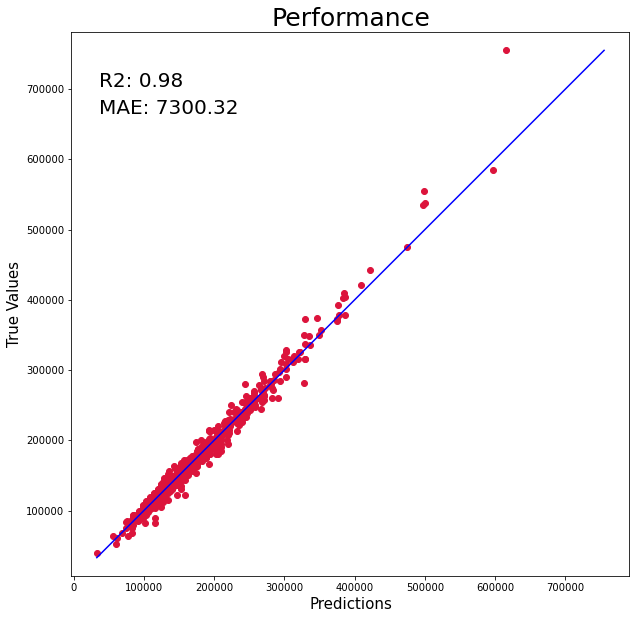

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Performance', fontsize=25)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str(round(GBM_Score,2)), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=20)
plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

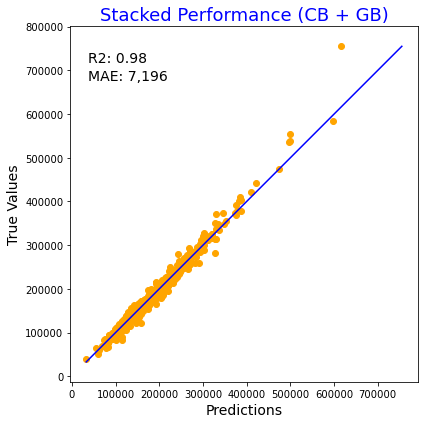

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(predicted_value, true_value, c='orange')
#plt.yscale('log')
#plt.xscale('log')

plt.style.use('default')
plt.style.use('ggplot')

plt.title('Stacked Performance (CB + GB)', fontsize=18, color='blue')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str('0.98'), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=14)
plt.annotate('MAE: ' + str('7,196'), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show();